<a href="https://colab.research.google.com/github/gtsagkatakis/OptimizationMethods_2023/blob/main/CSD573_lecture_3_ex_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Create a simple sky image with a point source
sky_size = 64
sky = np.zeros((sky_size, sky_size))
sky[sky_size//2, sky_size//2] = 1  # A point source in the center

#sky[12, 24] = 1  # A point source in the center

In [ ]:
# Simulate the Measurement Matrix A as a Fourier Transform matrix
F = np.fft.fftshift(np.fft.fft2(np.eye(sky_size**2).reshape(sky_size, sky_size, sky_size, sky_size)))

# Flatten the 2D sky image to 1D
sky_flat = sky.flatten()

# Simulate observed visibilities
v = (F.reshape(sky_size**2, sky_size**2) @ sky_flat)

# Add some noise (optional, to simulate real-world observations)
noise_level = 1
v += noise_level * (np.random.randn(sky_size**2))

In [ ]:
# Reconstruct the sky by matrix inversion
s_reconstructed = np.linalg.inv(F.reshape(sky_size**2, sky_size**2)) @ v
reconstructed_sky = s_reconstructed.reshape(sky_size, sky_size)

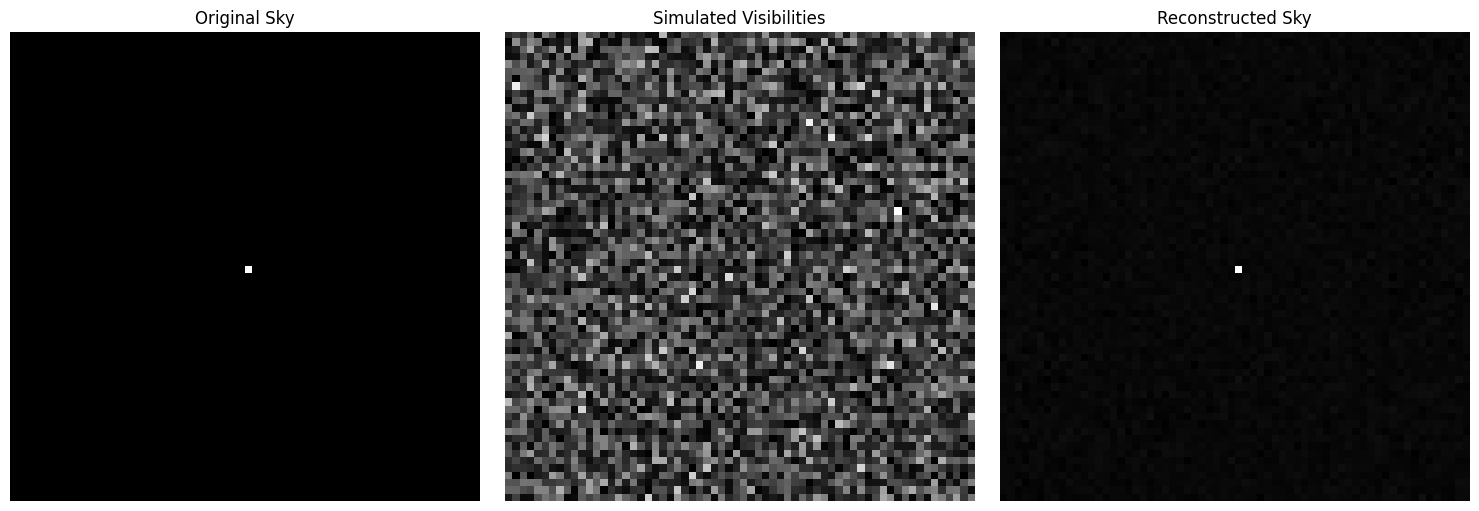

In [ ]:
# Plotting
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

ax[0].imshow(sky, cmap='gray')
ax[0].set_title('Original Sky')
ax[0].axis('off')

ax[1].imshow(np.abs(v.reshape(sky_size, sky_size)), cmap='gray')

ax[1].set_title('Simulated Visibilities')
ax[1].axis('off')

ax[2].imshow(reconstructed_sky.real, cmap='gray')
ax[2].set_title('Reconstructed Sky')
ax[2].axis('off')

plt.tight_layout()
plt.show()
